
# Picture notebook!

In [1]:
using Plots
using DelimitedFiles
using LaTeXStrings

In [2]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

## Model Selection

In [3]:
try_max = 5
T = 20

nobs_set=[50]
nobstot=length(nobs_set)

AUSI = zeros(nobstot,try_max,T)
AUSEIR = zeros(nobstot,try_max,T)
AUSEIR1 = zeros(nobstot,try_max,T)
planted = zeros(nobstot,try_max,T)
gener =  zeros(nobstot,try_max,T)
n_seir =  zeros(nobstot,try_max,T)
n_si = zeros(nobstot,try_max,T)
path = "./ModelSelection/MarkovMS2/"
for i=1:nobstot
    nobs=nobs_set[i]
    for trial in 1:try_max
        AUSI[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSI.txt")
        AUSEIR1[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSEIR1.txt")
        AUSEIR[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_AUcauSEIR.txt")
        planted[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_planted.txt") .* 1000
        gener[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_gener.txt")
        n_seir[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SEIR.txt")
        n_si[i,trial,:] = readdlm("$(path)/nobs=$(nobs)/try$(trial)_SI.txt")
    end
end

In [4]:
SIErr = zeros(nobstot,T)
SEIRErr = zeros(nobstot,T)
SEIR1Err = zeros(nobstot,T)
n_siErr = zeros(nobstot,T)
n_seirErr = zeros(nobstot,T)
plantedErr = zeros(nobstot,T)
generErr = zeros(nobstot,T)
for nobs=1:nobstot
    SIErr[nobs,:]=[err(AUSI[nobs,:,t]) for t in 1:T]
    SEIRErr[nobs,:]=[err(AUSEIR[nobs,:,t]) for t in 1:T]
    SEIR1Err[nobs,:]=[err(AUSEIR1[nobs,:,t]) for t in 1:T]
    n_siErr[nobs,:] = [err(n_si[nobs,:,t]) for t in 1:T]
    n_seirErr[nobs,:] = [err(n_seir[nobs,:,t]) for t in 1:T]
    plantedErr[nobs,:] = [err(planted[nobs,:,t]) for t in 1:T]
    generErr[nobs,:] = [err(gener[nobs,:,t]) for t in 1:T]
end

In [5]:
ob=1
p1=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:], fillalpha=0.3,color="red", ylims=(0.6,1),label="SI",title="nobs=N/10")
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:], fillalpha=0.3,color="blue", label="SEIR",xlabel="time")
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative",ylabel="AUC")

ob=2  
p2=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:],fillalpha=0.3, color="red", ylims=(0.6,1),label="SI",title="nobs=N/2")
p2=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:],fillalpha=0.3, color="blue", label="SEIR") 
p2=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,color="green", label="Generative") 


p3=plot(avg(planted[ob,:,:])', ribbon=plantedErr[ob,:], fillalpha=0.3,label="planted",xlabel="time",c="black")
p3=plot!(avg(n_si[ob,:,:])',ribbon=n_siErr[ob,:],fillalpha=0.3, label="SI",ylabel="n_infected",c="red")
p3=plot!(avg(n_seir[ob,:,:])',ribbon=n_seirErr[ob,:], fillalpha=0.3,label="SEIR",c="blue")
p3=plot!(avg(gener[ob,:,:])',ribbon=generErr[ob,:],label="generative",c="green")

plot(p1, p2, p3, size=(900,400), layout = (1, 3),legend=:bottom)
#savefig("./ModelSelection/SEIRvsSI.png")

LoadError: BoundsError: attempt to access 1×5×20 Array{Float64, 3} at index [2, 1:5, 1:20]

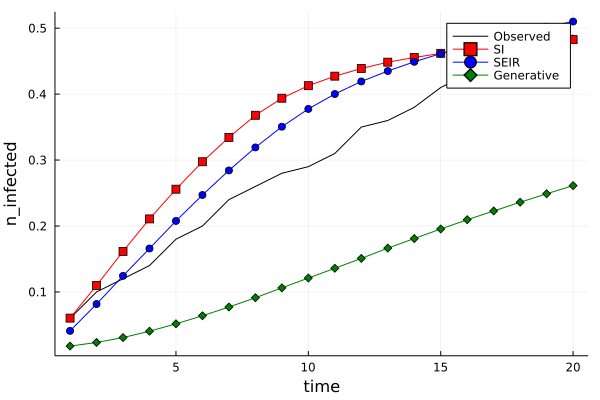

In [14]:
ob = 1
tr=5
p3=plot((planted[ob,tr,:]), fillalpha=0.3,label="Observed",xlabel="time",c="black")
p3=plot!((n_si[ob,tr,:]),marker=:rect,fillalpha=0.3, label="SI",ylabel="n_infected",c="red")
p3=plot!((n_seir[ob,tr,:]),marker=:circle, fillalpha=0.3,label="SEIR",c="blue")
p3=plot!((gener[ob,tr,:]),marker=:diamond,label="Generative",c="green")

In [7]:
ob=1
p1=plot(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:], linestyle=:dot, marker=:rect ,fillalpha=0.3,color="red", ylims=(0.6,1),label="Inferred SI posterior")

p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:], linestyle=:dot ,marker=:circle,fillalpha=0.3,color="blue", label="Inferred SEIR posterior",xlabel="time")
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:],linestyle=:dot ,fillalpha=0.3, marker=:diamond,color="green", label="SEIR posterior",annotations = (11, 0.9, Plots.text(L"n_{obs}=N/10",12)),ylabel="AUC")

ob=2  
p1=plot!(avg(AUSI[ob,:,:])', ribbon=SIErr[ob,:],fillalpha=0.3,marker=:rect, annotations = (10, 0.995, Plots.text(L"n_{obs}=N/2",12)), color="red", ylims=(0.6,1),label=false)
p1=plot!(avg(AUSEIR[ob,:,:])',ribbon=SEIRErr[ob,:],fillalpha=0.3,marker=:circle, color="blue", label=false) 
p1=plot!(avg(AUSEIR1[ob,:,:])',ribbon=SEIR1Err[ob,:], fillalpha=0.3,marker=:diamond,color="green", label=false,legend=:bottomright) 


p3=plot(avg(planted[ob,:,:])', ribbon=plantedErr[ob,:], fillalpha=0.3,annotations = (15, 0.1, Plots.text(L"\lambda=0.3",12)),label="Observed",xlabel="time",c="black")
p3=plot!(avg(n_si[ob,:,:])',ribbon=n_siErr[ob,:],marker=:rect,fillalpha=0.3, label="Inferred SI prior",ylabel="n_infected",c="red")
p3=plot!(avg(n_seir[ob,:,:])',ribbon=n_seirErr[ob,:],marker=:circle, fillalpha=0.3,label="Inferred SEIR prior",c="blue")
p3=plot!(avg(gener[ob,:,:])',ribbon=generErr[ob,:],marker=:diamond,label="SEIR prior",c="green",legend=:topleft)

plot(p1, p3, size=(600,300), markersize=3,layout = (1, 2),legendfontsize=5)
#savefig("./ModelSelection/SEIRvsSI.pdf")

LoadError: BoundsError: attempt to access 1×5×20 Array{Float64, 3} at index [2, 1:5, 1:20]

In [16]:
ob=1
p2=plot(avg(planted[ob,:,:])', ribbon=plantedErr[ob,:], fillalpha=0.3,label="Observed",xlabel="time",c="black")
p2=plot!(avg(n_si[ob,:,:])',ribbon=n_siErr[ob,:],marker=:rect,fillalpha=0.3, label="Inferred SI prior",ylabel="n_infected",c=:reds)
p2=plot!(avg(n_seir[ob,:,:])',ribbon=n_seirErr[ob,:],marker=:circle, fillalpha=0.3,label="Inferred SEIR prior",c=:blues)
p2=plot!(avg(gener[ob,:,:])',ribbon=generErr[ob,:],marker=:diamond,label="SEIR prior",annotations = (15, 0.1, Plots.text(L"\lambda=0.15",12)),c=:greens,legend=:topleft)
plot(p1, p3,p2, size=(900,300), markersize=3,layout = (1, 3),legendfontsize=3,margin=5Plots.mm)
#savefig("./ModelSelection/SEIRvsSI.pdf")

## RealGraphs Inference

In [101]:
T = 20
try_max = 4

4

In [111]:
try_max = 4
pahtstring = "./RealGraph/OpenABM2/"
path2= "_rand_obs_seed"
state = "1"
N = 1000
AUcau = zeros(try_max,T)
AUsib = zeros(try_max,T)
AUsoft = zeros(try_max,T)
for seed in 1:try_max
    AUcau[seed,:] = readdlm("$(pahtstring)Cau$(path2)$(seed)_N_$(N)_obsT_$(state).txt") 
    AUsoft[seed,:] = readdlm("$(pahtstring)Soft$(path2)$(seed)_N_$(N)_obsT_$(state).txt")
    AUsib[seed,:] = readdlm("$(pahtstring)Sib$(path2)$(seed)_N_$(N)_obsT_$(state).txt")
end

cauErr=[err(AUcau[:,t]) for t in 1:T]
softErr=[err(AUsoft[:,t]) for t in 1:T]
sibErr=[err(AUsib[:,t]) for t in 1:T]


p1=plot(avg(AUcau)',markershape=:circle,title="OpenABM",ribbon=cauErr,c=:blue,fillalpha=0.5,label="cau")
p1=plot!(avg(AUsib)',markershape=:square,ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="time")
p1=plot!(avg(AUsoft)',ribbon=softErr,markershape=:star5,c=:yellow,fillalpha=0.3,label="soft",ylabel="AUC")
savefig("./RealGraph/RealGraph.pdf")

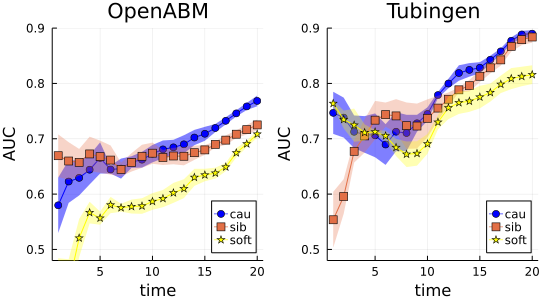

In [110]:
pahtstring = "./RealGraph/Tubingen/"
path2= "_rand_obs"
try_max = 4
AUcau = zeros(try_max,T)
AUsib = zeros(try_max,T)
AUsoft = zeros(try_max,T)
for seed in 1:try_max
    AUcau[seed,:] = readdlm("$(pahtstring)Cau_obsT_seed$(seed).txt") 
    AUsoft[seed,:] = readdlm("$(pahtstring)Soft_obsT_seed$(seed).txt")
    AUsib[seed,:] = readdlm("$(pahtstring)Sib_obsT_seed$(seed).txt")
end

cauErr=[err(AUcau[:,t]) for t in 1:T]
softErr=[err(AUsoft[:,t]) for t in 1:T]
sibErr=[err(AUsib[:,t]) for t in 1:T]

p2=plot(avg(AUcau)',markershape=:circle,title="Tubingen",ribbon=cauErr,c=:blue,fillalpha=0.5,label="cau")
p2=plot!(avg(AUsib)',markershape=:square,ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="time")
p2=plot!(avg(AUsoft)',ribbon=softErr,markershape=:star5,c=:yellow,fillalpha=0.3,label="soft",ylabel="AUC")
plot(p2)
plot(p1,p2, layout=(1,2),size=(550,300),markersize=4,legendfontsize=5,legend=:bottomright,ylims=(0.48,0.9))
#savefig("./RealGraph/RealGraph.pdf")

## SimulatedGraphs Inference

In [52]:
try_max = 9
nobs_set = [0,1,2,5,10,40]
pahtstring = "./SimulatedGraphs/SimulatedGraphData2/"
nobs_set = [5,40,150]
nobs_set = [1,2,3,4,5]
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
AUMF = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mc.txt")
        AUMF[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mf.txt")
    end
end

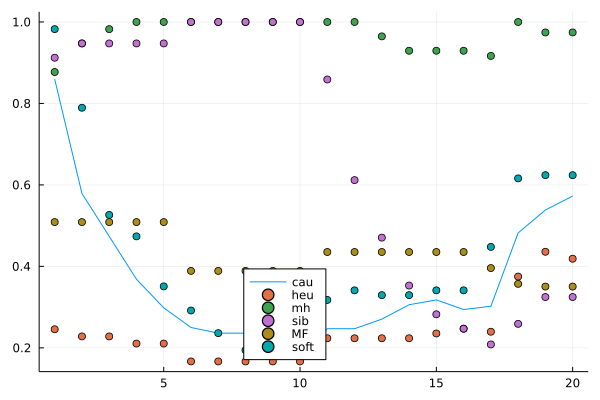

In [53]:
tr, obs = 1,1
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUMF[tr,obs,:],label="MF")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

#ylims!(0.5,1.01)

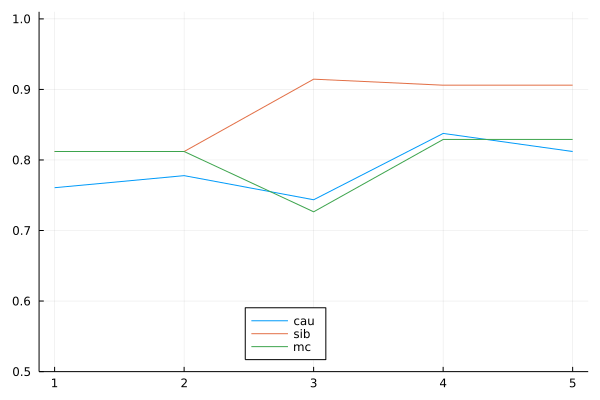

In [54]:
tr, time = 6 , T
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
#plot!(nobs_set,AUheu[tr,:,time], label = "heu")
#plot!(nobs_set,AUsoft[tr,:,time], label="soft")
#plot!(nobs_set,AUMF[tr,:,time], label="MF")

#savefig("../provaSoft")
ylims!(0.5,1.01)

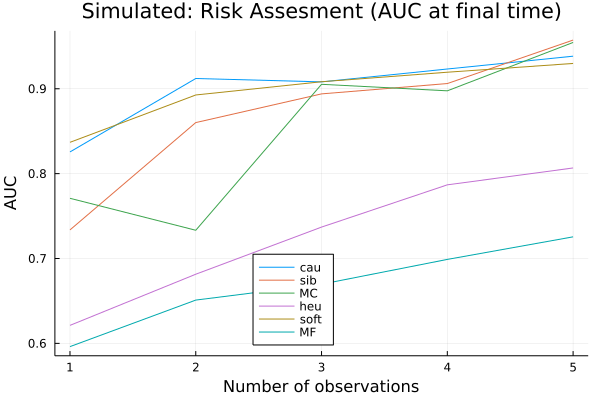

In [55]:
t = T
plot(nobs_set,avg(AUcau[:,:,t])',label="cau",title="Simulated: Risk Assesment (AUC at final time)")
plot!(nobs_set ,avg(AUsib[:,:,t])',label="sib",xlabel="Number of observations")
plot!(nobs_set ,avg(AUmh[:,:,t])',fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set ,avg(AUheu[:,:,t])',fillalpha=0.3,label="heu")
plot!(nobs_set ,avg(AUsoft[:,:,t])',fillalpha=0.3,label="soft")
plot!(nobs_set ,avg(AUMF[:,:,t])',fillalpha=0.3,label="MF")

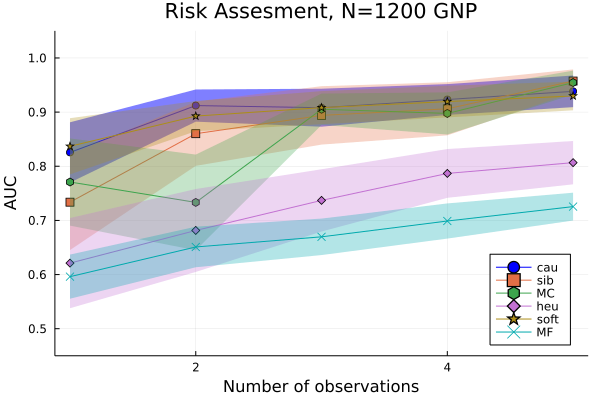

In [56]:
cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,end]) for r in 1:length(nobs_set)]

t=0
p1=plot(nobs_set[1:end-t],avg(AUcau[:,1:end-t,end])',markershape=:circle,ribbon=cauErr,c=:blue,fillalpha=0.5,label="cau",title="Risk Assesment, N=1200 GNP")
p1=plot!(nobs_set[1:end-t] ,avg(AUsib[:,1:end-t,end])',markershape=:square,ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
p1=plot!(nobs_set[1:end-t] ,avg(AUmh[:,1:end-t,end])',markershape=:hexagon,ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottomright)
p1=plot!(nobs_set[1:end-t] ,avg(AUheu[:,1:end-t,end])',markershape=:diamond,ribbon=heuErr,fillalpha=0.3,label="heu")
p1=plot!(nobs_set[1:end-t] ,avg(AUsoft[:,1:end-t,end])',markershape=:star5,ribbon=softErr,fillalpha=0.3,label="soft")
p1=plot!(nobs_set[1:end-t] ,avg(AUMF[:,1:end-t,end])',markershape=:x,ribbon=mfErr,fillalpha=0.3,label="MF",xticks=0:2:10)
ylims!(0.45,1.05)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/RiskAssesment.pdf")

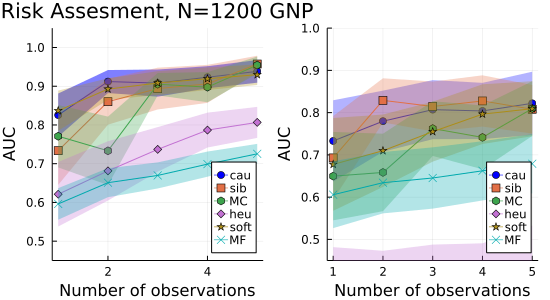

In [57]:
cauErr=[err(AUcau[:,r,1]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,1]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,1]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,1]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,1]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,1]) for r in 1:length(nobs_set)]



p2=plot(nobs_set ,avg(AUcau[:,:,1])',markershape=:circle,ribbon=cauErr,c=:blue,fillalpha=0.3,label="cau")#,title="Zero Patient")
p2=plot!(nobs_set ,avg(AUsib[:,:,1])',markershape=:square,ribbon=sibErr,fillalpha=0.3,label="sib",xlabel="Number of observations")
p2=plot!(nobs_set ,avg(AUmh[:,:,1])',markershape=:hexagon,ribbon=mhErr,fillalpha=0.3,label="MC",ylabel="AUC",legend=:bottom)
p2=plot!(nobs_set ,avg(AUheu[:,:,1])',markershape=:diamond,ribbon=heuErr,fillalpha=0.3,label="heu")
p2=plot!(nobs_set ,avg(AUsoft[:,:,1])',markershape=:star5,ribbon=softErr,fillalpha=0.3,label="soft")
p2=plot!(nobs_set ,avg(AUMF[:,:,1])',markershape=:x,ribbon=mfErr,fillalpha=0.3,label="MF",legend=:bottomright)
ylims!(0.45,1)
plot(p1,p2,layout=(1,2),size=(550,300),markersize=4,legendfontsize=5)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/Performance.pdf")

# Scaling 


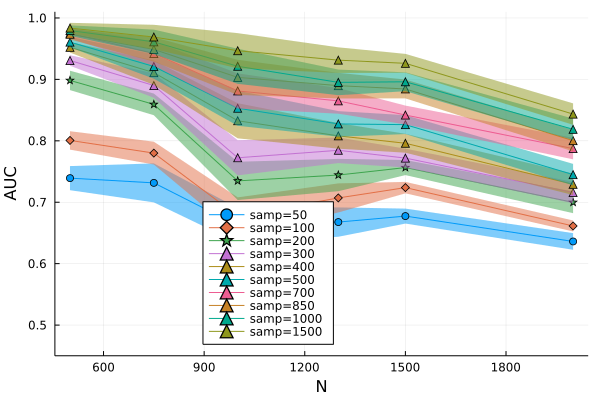

In [41]:
try_max = 10
numsamplesList = [50,100,200,500,1000,2000,4000]
Nlist = [200,500,750,1000,1500,2000]
Nlist = [500,750,1000,1300,1500,2000]
numsamplesList = [50,100,200,300,400,500,700,850,1000,1500,2000,3000,4000]
pathstring="Scaling/try3/"
T = 20
AUcau = zeros(try_max,length(Nlist),T,length(numsamplesList))
for trial = 1:try_max
    for r = 1:length(Nlist)
        for sL = 1:length(numsamplesList)
            numsamples = numsamplesList[sL]
            N = Nlist[r]
            AUcau[trial,r,:,sL] = readdlm("$(pathstring)try$(trial)numsamp$(numsamples)N$(N)cau.txt")
        end
    end
end


Err1=[err(AUcau[:,r,T,1]) for r in 1:length(Nlist)]
Err2=[err(AUcau[:,r,T,2]) for r in 1:length(Nlist)]
Err3=[err(AUcau[:,r,T,3]) for r in 1:length(Nlist)]
Err4=[err(AUcau[:,r,T,4]) for r in 1:length(Nlist)]

p1 = plot(Nlist,avg(AUcau[:,:,T,1])',marker=:circle,ribbon=Err1,label="samp=$(numsamplesList[1])",xlabel="N", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,2])',marker=:diamond,ribbon=Err2,label="samp=$(numsamplesList[2])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,3])',marker=:star,ribbon=Err3,label="samp=$(numsamplesList[3])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,4])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[4])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,5])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[5])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,6])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[6])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,7])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[7])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,8])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[8])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,9])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[9])",ylabel="AUC", legend=:bottom)
p1 = plot!(Nlist,avg(AUcau[:,:,T,10])',marker=:utriangle,ribbon=Err4,label="samp=$(numsamplesList[10])",ylabel="AUC", legend=:bottom)

ylims!(0.45,1.01)




plot(p1)
#savefig("./Scaling/scaling.pdf")

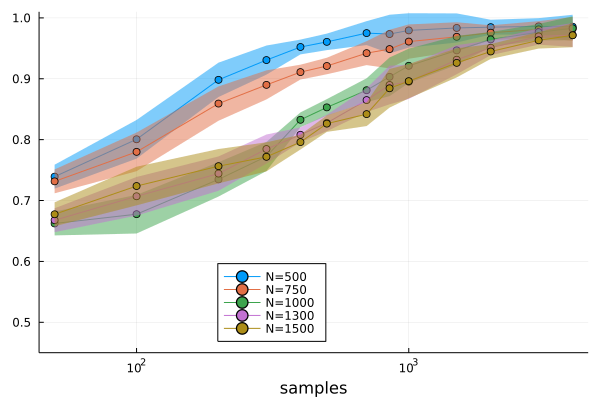

In [42]:
p1 = plot(numsamplesList,avg(AUcau[:,1,T,:])',marker=:circle,ribbon=Err1,label="N=$(Nlist[1])",xlabel="samples", legend=:bottom)
p1 = plot!(numsamplesList,avg(AUcau[:,2,T,:])',marker=:circle,ribbon=Err1,label="N=$(Nlist[2])",xlabel="samples", legend=:bottom)
p1 = plot!(numsamplesList,avg(AUcau[:,3,T,:])',marker=:circle,ribbon=Err1,label="N=$(Nlist[3])",xlabel="samples", legend=:bottom)
p1 = plot!(numsamplesList,avg(AUcau[:,4,T,:])',marker=:circle,ribbon=Err1,label="N=$(Nlist[4])",xlabel="samples", legend=:bottom)
p1 = plot!(numsamplesList,avg(AUcau[:,5,T,:])',marker=:circle,xaxis=:log,ribbon=Err1,label="N=$(Nlist[5])",xlabel="samples", legend=:bottom)
ylims!(0.45,1.01)
#savefig("./Scaling/Nscaling.pdf")


In [43]:
function nonzeros(s)
    count = 0
    for l in s
        (l != 0) && (count += 1)
    end
    return count
end

using CurveFit


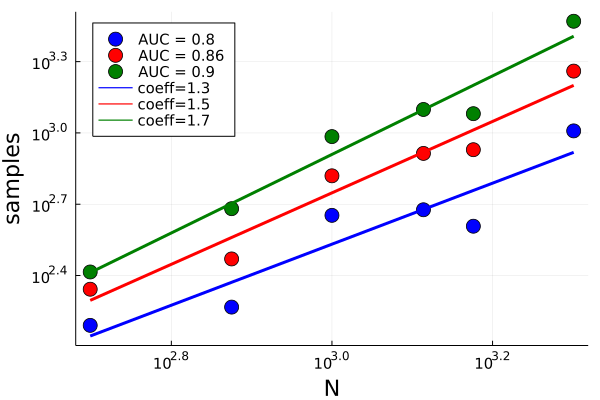

In [102]:
xvalues = [0.8, 0.86, 0.9]
mins=0
avgSamp = zeros(length(xvalues),length(Nlist))
errSamp = zeros(length(xvalues),length(Nlist))
for r = 1:length(xvalues)
    for Nindic = 1:length(Nlist)
        x = xvalues[r]
        sampMatrix = (AUcau[:,Nindic,T,:] .> x) .* numsamplesList'
        sampMatrix = [( s == 0 ? 100000 : s) for s in sampMatrix]
        mins = [minimum(sampMatrix[r,:]) for r=1:size(sampMatrix,1)]
        avgSamp[r,Nindic] = sum(mins) / nonzeros(mins)
        errSamp[r,Nindic] = sqrt(sum((mins .- avgSamp[r,Nindic]) .^ 2)) / nonzeros(mins)
    end
end

p1=scatter(Nlist,avgSamp[1,:],marker=:circle,c=:blue,xlabel="N",markersize=8,ylabel="samples",label="AUC = $(xvalues[1])")
p1=scatter!(Nlist,avgSamp[2,:],marker=:circle,c=:red,xlabel="N",markersize=8,ylabel="samples",label="AUC = $(xvalues[2])")
p1=scatter!(Nlist,avgSamp[3,:],marker=:circle,c=:green,xlabel="N",markersize=8,ylabel="samples",label="AUC = $(xvalues[3])")

a,b = linear_fit(log.(Nlist),log.(avgSamp[1,:])) 
fit_curve = Nlist .^ b * exp(a)
p1 = plot!(Nlist,fit_curve,c=:blue,width=3,label="coeff=$(round(b,digits=1))")
c,d = linear_fit(log.(Nlist),log.(avgSamp[2,:])) 
fit_curve = Nlist .^ d * exp(c)
p1 = plot!(Nlist,fit_curve,width=3,label="coeff=$(round(d,digits=1))",c=:red)
e,f = linear_fit(log.(Nlist),log.(avgSamp[3,:])) 
fit_curve = Nlist .^ f * exp(e)
p1 = plot!(Nlist,fit_curve,width=3,label="coeff=$(round(f,digits=1))",c=:green)
#p1=plot(Nlist,avgSamp[2,:],marker=:circle,xlabel="N",ylabel="samples",label="x = $(xvalues[3])")
#ylims!(50,4000)
#p1=plot!(Nlist,avgSamp[4,:],marker=:circle,xlabel="N",ylabel="samples",label="x = $(xvalues[4])")
plot(p1, xaxis=:log,yaxis=:log,legend=:topleft,legendfontsize=10,tickfontsize=10,labelfontsize=15)
#savefig("./Scaling/scaling.pdf")
#ordinate = Nlist .* 3 .- 1200
#plot!(Nlist,ordinate)



## Hyperparameters Inference

In [3]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

In [4]:

p1 = heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),fe',c=:acton, xlabel="γ",clim=(minimum(fe),65),ylabel="λ")
#p1 = contour!(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),fe',xlabel="pseed",clim=(minimum(fe),65),ylabel="infection peak",title="Heat map for free energy in function of hyperparams")

col =:white
for st=1:10:100
    #p1 = plot!(d1[st:10:st+10,1],d1[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d2[st:10:st+10,1],d2[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d3[st:10:st+10,1],d3[st:10:st+10,2],c=col,arrow=true)
    p1 = plot!(d4[st:10:st+10,1],d4[st:10:st+10,2],c=col,arrow=true)
end

#plot!(d1[1:10:end,1],d1[1:10:end,2],c=col,arrow=true)
plot!(d2[1:10:end,1],d2[1:10:end,2],c=col)
plot!(d3[1:10:end,1],d3[1:10:end,2],c=col)
plot!(d4[1:10:end,1],d4[1:10:end,2],c=col)
#plot!(d5[1:10:end,1],d5[1:10:end,2],c=:orange)
#=scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]],legend=false)=#
#scatter!([d5[end,1]],[d5[end,2]],legend=false)
scatter!([1/40,],[0.1],label="True",shape=:star,markersize=10,legend=false)
plot(p1)
savefig("./Hyperparams/Hyperdescent.pdf")    

## Hyperparams Comparison

In [18]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

In [19]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperCauF.pdf")

In [20]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSoftF.pdf")

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSSoftF.pdf")